# LIMPIEZA DE DATOS

## Revisión del Dataset

In [290]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [292]:
# Leer el archivo
print("\033[1;35m" + "DATASET VIDEOJUEGOS" + "\033[0m\n")
dfv = pd.read_csv('dataset_videojuegos.csv')
dfv.head()

DATASET VIDEOJUEGOS



,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [294]:
# Obtener información general
print("\033[1;36m" + "Información General" + "\033[0m\n")
dfv.info()

Información General

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


In [296]:
# Verificar si existen filas repetidas
print("\033[1;36m" + "Existencia de Filas Repetidas" + "\033[0m")
print(dfv.duplicated().sum())

Existencia de Filas Repetidas
0


## Valores nulos

In [299]:
# Verificar valores faltantes
print("\033[1;36m" + "Valores Nulos" + "\033[0m\n")
print(dfv.isnull().sum())

Valores Nulos

name              0
platform          0
release_date      0
summary         114
meta_score        0
user_review       0
dtype: int64


In [301]:
# Revisar su porcentaje
null = dfv.isnull().sum().sort_values(ascending = False)
null_counts = null[null > 0]

for col in null_counts.index:
    perc = ((dfv[col].isnull().sum() / len(dfv)) * 100).round(2)
    print(f"\033[36;1mFilas faltantes en {col}:\033[0m {dfv[col].isnull().sum()}, \033[36;1mPorcentaje:\033[0m {perc}%")

Filas faltantes en summary: 114, Porcentaje: 0.61%


#### Eliminación
Como representa un muy bajo porcentaje, el eliminarlos no afectará significativamente el tamaño del dataset y asegurará que todas las filas estén completas.

In [304]:
dfv = dfv.dropna(subset=['summary'])

In [306]:
print("\033[1;35m" + "DATASET DESPUÉS DE ELIMINACIÓN" + "\033[0m\n")
dfv.head()

DATASET DESPUÉS DE ELIMINACIÓN



,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


#### Sustitución
En cambio, si preferimos mantener las filas, podemos rellenar los nulos con un texto predeterminado como _No summary available_.

In [211]:
dfv['summary'] = dfv['summary'].fillna('No summary available')

In [213]:
print("\033[1;35m" + "DATASET DESPUÉS DE SUSTITUCIÓN" + "\033[0m\n")
dfv[dfv['summary'] == 'No summary available']

DATASET DESPUÉS DE SUSTITUCIÓN



,name,platform,release_date,summary,meta_score,user_review
833,Injustice 2: Legendary Edition,PlayStation 4,"March 27, 2018",No summary available,88,7.6
1472,Moto Racer Advance,Game Boy Advance,"December 5, 2002",No summary available,86,tbd
1535,Mini Metro,Switch,"August 30, 2018",No summary available,86,8.4
1649,Out of the Park Baseball 13,PC,"April 9, 2012",No summary available,85,7.8
2427,Guild Wars 2: Path of Fire,PC,"September 22, 2017",No summary available,83,7.3
...,...,...,...,...,...,...
17999,One Piece: Unlimited Cruise SP,PlayStation 4,"February 10, 2012",No summary available,46,7.0
18134,AeternoBlade II,Wii U,"October 11, 2019",No summary available,44,4.4
18253,Surgeon Simulator: Experience Reality,PlayStation 4,"December 3, 2016",No summary available,43,4.3
18532,The Ripping Friends,Game Boy Advance,"March 24, 2002",No summary available,38,tbd


En mi caso, preferí eliminar las filas nulas.

## Columna user_review
Los valores _"to be determined" (por determinar)_.
En el contexto del dataset, la columna _user_review_ usa **tbd** para indicar que la puntuación o reseña de los usuarios aún no está disponible o no se ha determinado, es decir, se convierte en data faltante.

In [308]:
# Verificar cantidad de valores que coinciden
tbd = (dfv['user_review'] == 'tbd').sum()
print(f"\033[36;1mFilas con tbd en user_review:\033[0m {tbd}, \033[36;1mPorcentaje:\033[0m {((tbd / len(dfv)) * 100).round(2)}%")

Filas con tbd en user_review: 1345, Porcentaje: 7.2%


#### Convertir tipo de dato de object a float
Para cambiarlo, nos debemos asegurar de que todos los valores en esa columna sean convertibles a números, por lo que primero necesitamos manejar esos valores antes de realizar la conversión.

In [311]:
# Reemplazar 'tbd' con NaN
dfv['user_review'] = dfv['user_review'].replace('tbd', np.nan)

In [313]:
# Verificar valores nulos en dataset
print("\033[1;35m" + "DATASET DESPUÉS DE SUSTITUCIÓN" + "\033[0m\n")
dfv[dfv['user_review'].isnull()]

DATASET DESPUÉS DE SUSTITUCIÓN



,name,platform,release_date,summary,meta_score,user_review
679,Synth Riders,PlayStation 4,"August 10, 2021",Synth Riders is your freestyle dancing VR rhyt...,89,NaN
963,Tiger Woods PGA Tour 2005,GameCube,"September 20, 2004",Challenge professional golfer Tiger Woods to c...,88,NaN
1277,NASCAR 2005: Chase for the Cup,Xbox,"August 31, 2004",Do you have what it takes to be a top NASCAR d...,86,NaN
2098,Mushihimesama,Switch,"June 15, 2021",Mushihimesama (Bug Princess in English) is a v...,84,NaN
2178,Tails Of Iron,Xbox Series X,"September 17, 2021","Set in a grim land plagued by war, Tails of Ir...",84,NaN
...,...,...,...,...,...,...
18592,Dream Chronicles,Xbox 360,"October 20, 2010",Unlock the secrets of the beautiful and myster...,36,NaN
18594,Air Conflicts: Aces of World War II,PSP,"April 14, 2009",Air Conflicts is an arcade flight simulator ga...,36,NaN
18639,King of Clubs,Wii,"August 4, 2008","Never the same game twice, this absorbing and ...",35,NaN
18700,Jenga World Tour,DS,"November 13, 2007",Jenga is based on the world famous wooden bloc...,32,NaN


In [315]:
# Realizar conversión de tipos de datos
dfv['user_review'] = dfv['user_review'].astype(float)
print("\033[1;36m" + "Nueva Información General" + "\033[0m\n")
dfv.info()

Nueva Información General

<class 'pandas.core.frame.DataFrame'>
Index: 18686 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18686 non-null  object 
 1   platform      18686 non-null  object 
 2   release_date  18686 non-null  object 
 3   summary       18686 non-null  object 
 4   meta_score    18686 non-null  int64  
 5   user_review   17341 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1021.9+ KB


In [331]:
# Reemplazar valores nulos con 0 
dfv['user_review'] = dfv['user_review'].fillna(0)
print("\033[1;36m" + "Sustitución de user_review" + "\033[0m\n")
dfv[dfv['user_review'] == 0]

Sustitución de user_review



,name,platform,release_date,summary,meta_score,user_review
679,Synth Riders,PlayStation 4,2021-08-10,Synth Riders is your freestyle dancing VR rhyt...,89,0.0
963,Tiger Woods PGA Tour 2005,GameCube,2004-09-20,Challenge professional golfer Tiger Woods to c...,88,0.0
1277,NASCAR 2005: Chase for the Cup,Xbox,2004-08-31,Do you have what it takes to be a top NASCAR d...,86,0.0
2098,Mushihimesama,Switch,2021-06-15,Mushihimesama (Bug Princess in English) is a v...,84,0.0
2178,Tails Of Iron,Xbox Series X,2021-09-17,"Set in a grim land plagued by war, Tails of Ir...",84,0.0
...,...,...,...,...,...,...
18592,Dream Chronicles,Xbox 360,2010-10-20,Unlock the secrets of the beautiful and myster...,36,0.0
18594,Air Conflicts: Aces of World War II,PSP,2009-04-14,Air Conflicts is an arcade flight simulator ga...,36,0.0
18639,King of Clubs,Wii,2008-08-04,"Never the same game twice, this absorbing and ...",35,0.0
18700,Jenga World Tour,DS,2007-11-13,Jenga is based on the world famous wooden bloc...,32,0.0


## Columna release_date

#### Convertir tipo de dato de object a datetime

In [319]:
dfv['release_date'] = pd.to_datetime(dfv['release_date'])
print("\033[1;36m" + "Nueva Información General" + "\033[0m\n")
dfv.info()

Nueva Información General

<class 'pandas.core.frame.DataFrame'>
Index: 18686 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          18686 non-null  object        
 1   platform      18686 non-null  object        
 2   release_date  18686 non-null  datetime64[ns]
 3   summary       18686 non-null  object        
 4   meta_score    18686 non-null  int64         
 5   user_review   17341 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1021.9+ KB


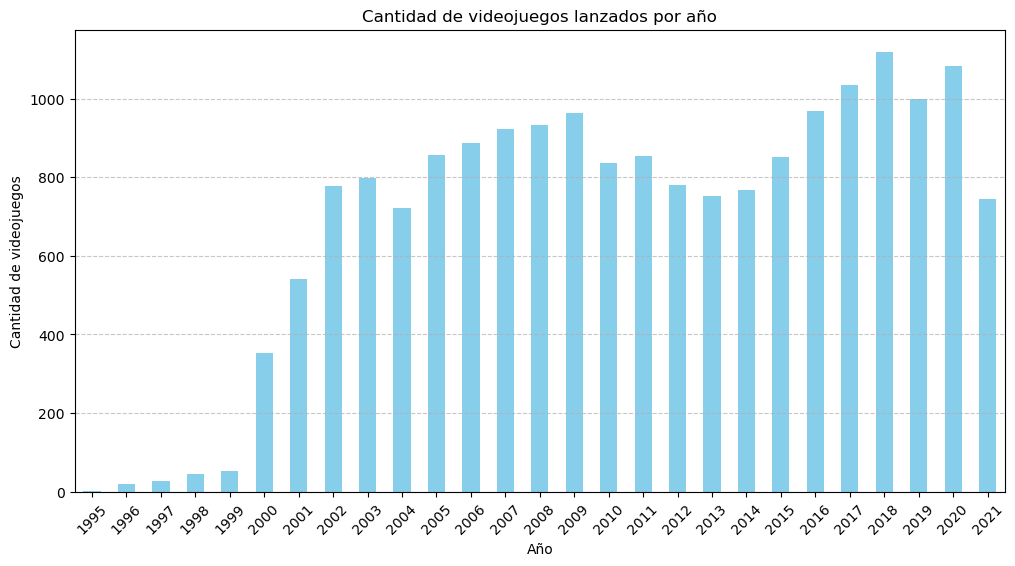

In [323]:
# Extraer el año
year = dfv['release_date'].dt.year

# Contar la cantidad de videojuegos por año
games = year.value_counts().sort_index()

# Crear la gráfica
plt.figure(figsize=(12, 6))
games.plot(kind='bar', color='skyblue')
plt.title('Cantidad de videojuegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de videojuegos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [343]:
# Eliminar los videojuegos debajo del año 2000
dfv = dfv[dfv['release_date'] > '2000-01-01']
dfv[dfv['release_date'] < '2000-01-01']

,name,platform,release_date,summary,meta_score,user_review


In [345]:
# Guardar los datos en un dataset nuevo y limpio
dfv.to_csv("videogames_clean.csv")